查看基本的表结构

In [2]:
import pandas as pd

ratings = pd.read_csv(
    "../datasets/ml-25m/ratings.csv"
)
ratings.head()


,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [3]:
movies = pd.read_csv(
    "../datasets/ml-25m/movies.csv",
)
movies.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


合并并查看合并后的表

In [4]:
df = pd.merge(ratings, movies[['movieId', 'title']], on='movieId')
df.head()


,userId,movieId,rating,timestamp,title
0,1,296,5.0,1147880044,Pulp Fiction (1994)
1,1,306,3.5,1147868817,Three Colors: Red (Trois couleurs: Rouge) (1994)
2,1,307,5.0,1147868828,Three Colors: Blue (Trois couleurs: Bleu) (1993)
3,1,665,5.0,1147878820,Underground (1995)
4,1,899,3.5,1147868510,Singin' in the Rain (1952)


查看评分的基本分布

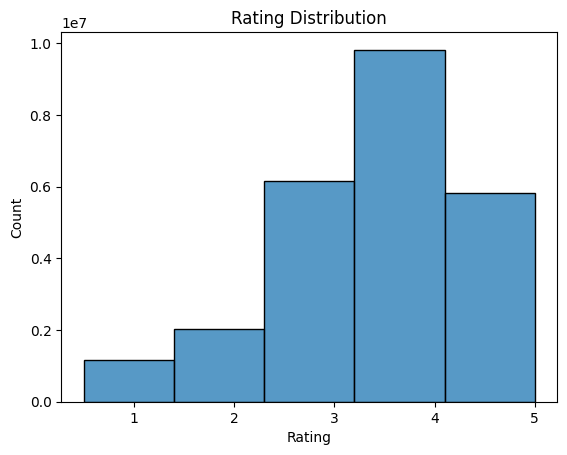

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['rating'], bins=5, kde=False)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


查看每个用户评分数量的分布

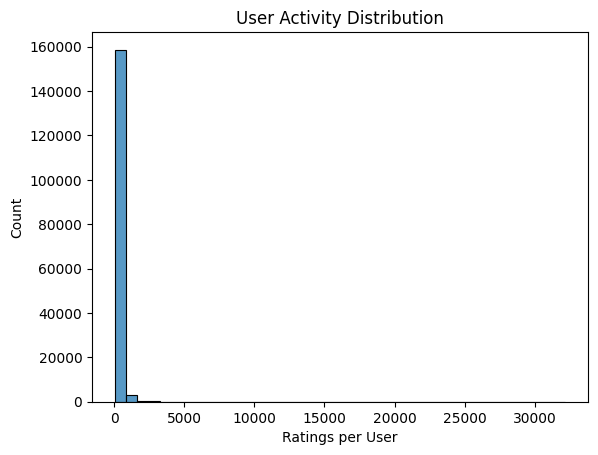

In [6]:
user_activity = df.groupby('userId')['rating'].count()
sns.histplot(user_activity, bins=40)
plt.title("User Activity Distribution")
plt.xlabel("Ratings per User")
plt.ylabel("Count")
plt.show()


部分用户评分过多，去除评分过多1%的用户后的结果如下

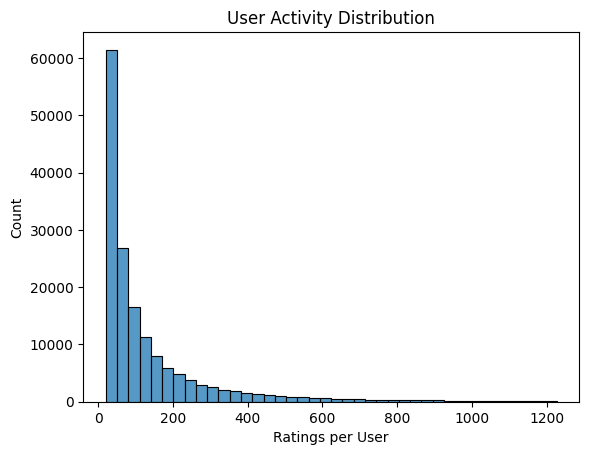

In [7]:
threshold = user_activity.quantile(0.99)
sns.histplot(user_activity[user_activity < threshold], bins=40)

plt.title("User Activity Distribution")
plt.xlabel("Ratings per User")
plt.ylabel("Count")
plt.show()

把电影按照评分数量进行排序

In [8]:
popular_movies = df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)
print(popular_movies)


title
Forrest Gump (1994)                          81491
Shawshank Redemption, The (1994)             81482
Pulp Fiction (1994)                          79672
Silence of the Lambs, The (1991)             74127
Matrix, The (1999)                           72674
Star Wars: Episode IV - A New Hope (1977)    68717
Jurassic Park (1993)                         64144
Schindler's List (1993)                      60411
Braveheart (1995)                            59184
Fight Club (1999)                            58773
Name: rating, dtype: int64


由于数据集过大，这里采用仅读取前2000个用户与电影评分的矩阵

In [9]:
small_df = df[df['userId'] < 2000]
rating_matrix = small_df.pivot_table(index='userId', columns='title', values='rating')

rating_matrix.head()

title,"""Great Performances"" Cats (1998)",$5 a Day (2008),'71 (2014),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'R Xmas (2001),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",...,Šíleně smutná princezna (1968),В движении (2002),Кентервильское привидение (1970),Когда зажигаются ёлки (1950),Ландыш серебристый (2000),Начальник,Обезьянки и грабители (1985),Он вам не Димон (2017),Приключения Домовёнка (1986),Принцесса и Людоед (1977)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
